<a href="https://colab.research.google.com/github/sangeetakar/New/blob/main/ML_ILLUSTRATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:52<00:00, 22.5MB/s]
100% 1.06G/1.06G [00:52<00:00, 21.9MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
 #Generators provided by Keras to reduce load on RAM
train_ds=tf.keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int', #cats will be assigned 0 and dogs 1
    batch_size=32,
    image_size=(256,256)
)

validation_ds=tf.keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int', #cats will be assigned 0 and dogs 1
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#Normalise
#Images stored in form of Numpy Array .Numpy array has value 0-255, but we need values from 0-1

def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [7]:
#Creating a CNN model
#3 convolution filters , 32->64->128 filters

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization()) #Adding this to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
history = model.fit(train_ds,epochs=100,validation_data=validation_ds) #There are 18 batches .625*32 =no of samples

Epoch 1/100
625/625 [==============================] - 67s 107ms/step - loss: 0.0266 - accuracy: 0.9918 - val_loss: 1.3581 - val_accuracy: 0.8068
Epoch 2/100
625/625 [==============================] - 69s 109ms/step - loss: 0.0382 - accuracy: 0.9895 - val_loss: 0.9968 - val_accuracy: 0.8274
Epoch 3/100
625/625 [==============================] - 66s 105ms/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.8362 - val_accuracy: 0.8332
Epoch 4/100
625/625 [==============================] - 65s 103ms/step - loss: 0.0240 - accuracy: 0.9919 - val_loss: 0.9297 - val_accuracy: 0.8070
Epoch 5/100
625/625 [==============================] - 65s 103ms/step - loss: 0.0269 - accuracy: 0.9922 - val_loss: 1.2437 - val_accuracy: 0.8220
Epoch 6/100
625/625 [==============================] - 66s 105ms/step - loss: 0.0181 - accuracy: 0.9944 - val_loss: 0.8366 - val_accuracy: 0.8326
Epoch 7/100
625/625 [==============================] - 67s 107ms/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 1.1511 -

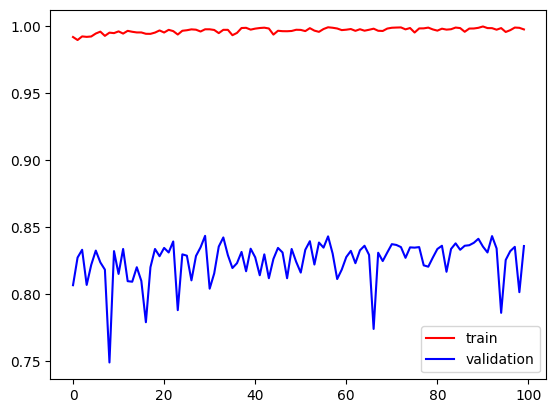

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()
#BEFORE

THE GAP BETWEEN TRAINED AND VALIDATION DATA SHOWS THAT THERE IS **OVERFITTING**
TO REDUCE IT WE WILL DO BATCH NORMALISATION /DROPOUT

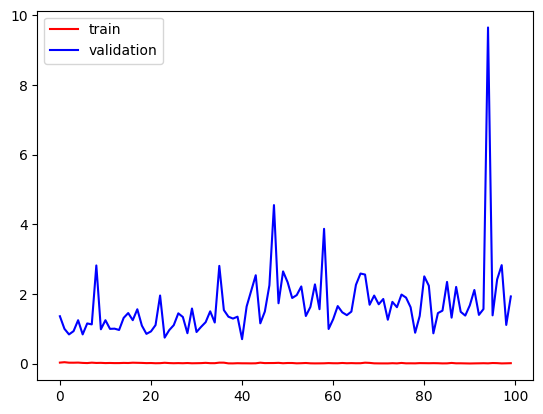

In [34]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [35]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [36]:
import cv2

In [55]:
test_img = cv2.imread('/content/worlds-smallest-dogs-1647336453.jpg')

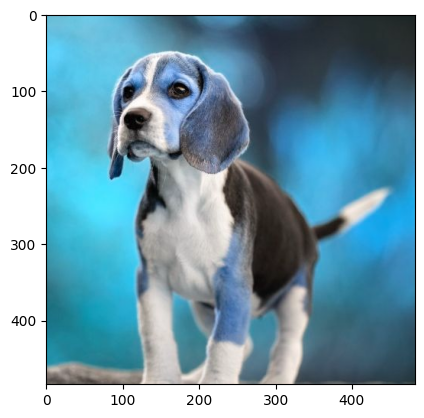

In [56]:
plt.imshow(test_img)

In [57]:
test_img.shape

(484, 483, 3)

In [58]:
test_img = cv2.resize(test_img,(256,256))

In [59]:
test_input = test_img.reshape((1,256,256,3))

In [60]:
model.predict(test_input)

1/1 [==============================] - 0s 22ms/step


array([[0.]], dtype=float32)